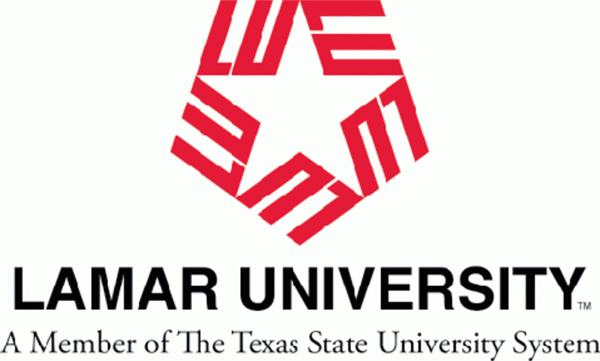

<h1 style="text-align: center; color: magenta;">Concrete Crack Classification using Convolutional Neural Network CNN</h1>
<h4 style="text-align: center; color: red;">Fine tunning with VGG16</h4>
<h2 style="text-align: center; color: purple;">Ademola Ibironke</h2>

<h3 style="text-align: center; color: blue;">Submitted to Dr. Venkatesh Uddameri</h2>

<h2 style="text-align: left; color: purple;">CNN Model Architecture</h2>
<h4 style="text-align: left; color: purple;">convolution + ReLu</h4>
convolution operation is performed on grided images to detect features and create feature maps using filters of specified shape.ReLu makes the model non-linear by replacing the negative values in the feature map with zero, speeding up training.
<h4 style="text-align: left; color: purple;">pooling using strides </h4>
Aggregates layers of filters, reduces the dimension and generates new reduced feature maps for the next layer in strides. Reduces overfitting. Maxpooling & Convolution helps with position invariant feature detection.
<h4 style="text-align: left; color: purple;">flattening</h4>
compresses multi-dimensional feature maps or arrays into single array.
<h4 style="text-align: left; color: purple;">fully connected dense neural network</h4>
This is where classification takes place.

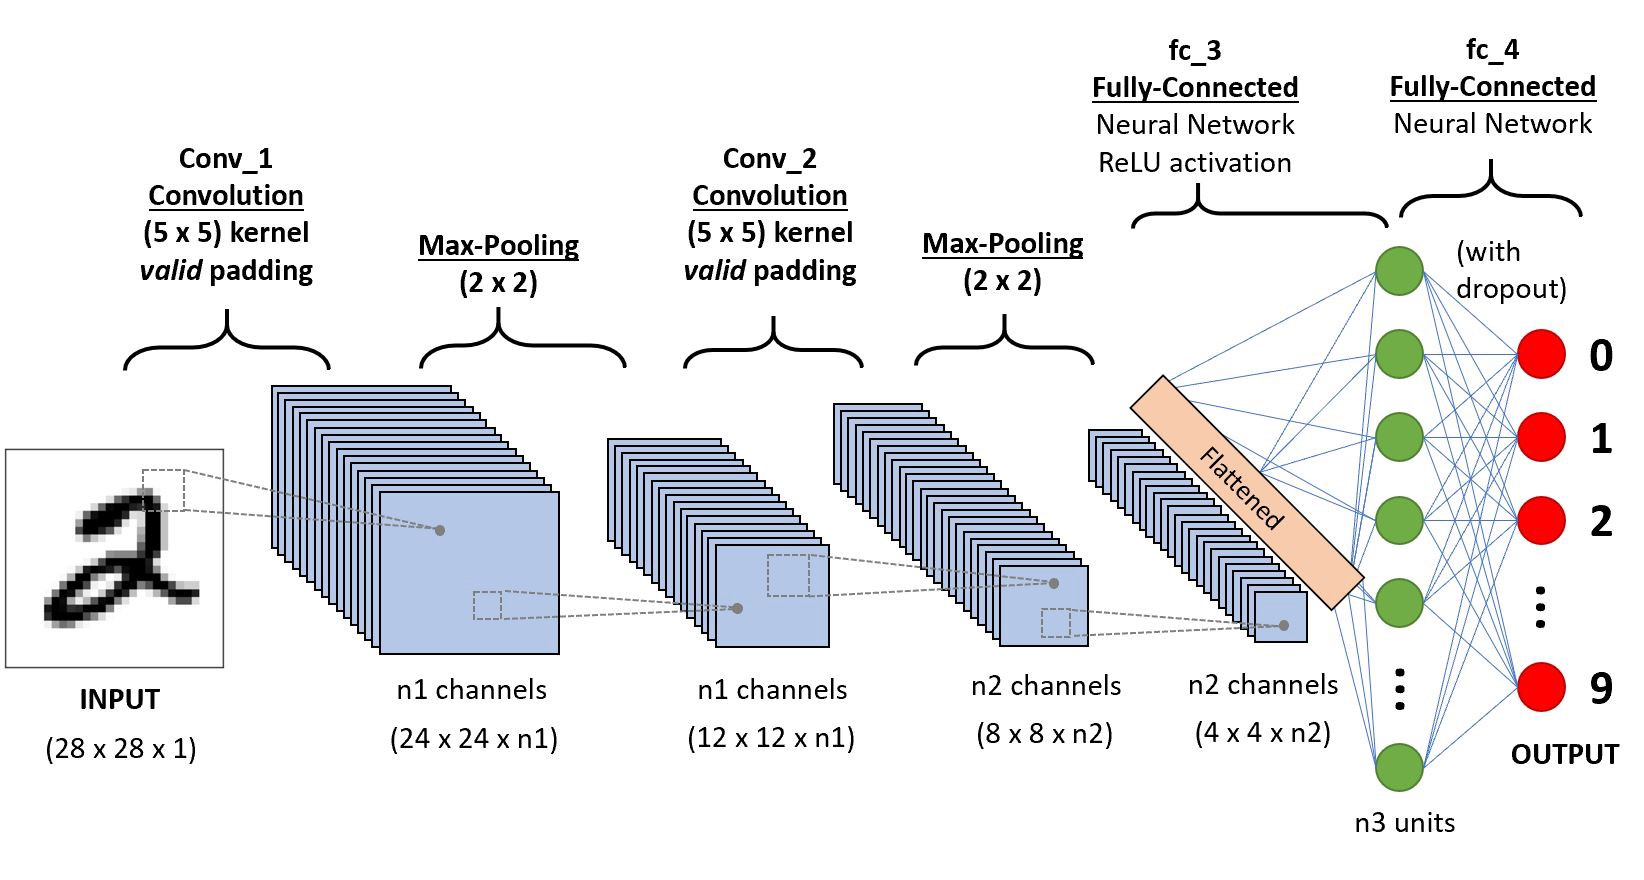

### Simple CNN Using Kares Sequential API

#### Based on 458 cracked and uncracked concrete road images

## code

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the training and validation data directories
train_dir = 'F:/cracks/train'
val_dir = 'F:/cracks/validation'
test_dir = 'F:/cracks/test'

In [3]:
# Define the image data generators for training and validation data and scale them
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Define the batch size and image size
batch_size = 32
img_size = (256, 256)

In [5]:
# Define the training and validation data generators
#generate batches of images and their corresponding labels
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size, #The size to which the images will be resized
    batch_size=batch_size, #The number of images to include in each batch.
    class_mode='binary', #'binary' signifies only two classes (cracked and uncracked concrete roads
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir, # to preprocess and augment the training data on-the-fly during training
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 166 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [6]:
# Define the CNN model architecture
model = tf.keras.models.Sequential([ #creates a linear stack of layers
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)), #convolutional layer with hyperparameter of 16 filters of size 3x3.
    tf.keras.layers.MaxPooling2D(2,2), #downsamples the output of the previous layer by taking the maximum value in each 2x2 patch
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),#relu makes the model non-linear by replacing the negative values in the feature map with zero
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),#flattens the output of the previous layer into a 1D array.
    tf.keras.layers.Dense(512, activation='relu'), #fully connected layer with 512 neurons for classification
    tf.keras.layers.Dense(1, activation='sigmoid')#This is the final output layer with 1 neuron
])

In [7]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/20
6/6 [==============================] - 102s 18s/step - loss: 0.1324 - accuracy: 0.9639 - val_loss: 0.2633 - val_accuracy: 0.9338
Epoch 2/20
6/6 [==============================] - 80s 14s/step - loss: 0.1047 - accuracy: 0.9639 - val_loss: 0.2758 - val_accuracy: 0.9265
Epoch 3/20
6/6 [==============================] - 78s 14s/step - loss: 0.0740 - accuracy: 0.9819 - val_loss: 0.3812 - val_accuracy: 0.9191
Epoch 4/20
6/6 [==============================] - 79s 14s/step - loss: 0.0530 - accuracy: 0.9819 - val_loss: 0.5633 - val_accuracy: 0.8235
Epoch 5/20
6/6 [==============================] - 91s 17s/step - loss: 0.1163 - accuracy: 0.9458 - val_loss: 0.2232 - val_accuracy: 0.9191
Epoch 6/20
6/6 [==============================] - 81s 14s/step - loss: 0.0969 - accuracy: 0.9639 - val_loss: 0.3622 - val_accuracy: 0.9265
Epoch 7/20
6/6 [==============================] - 94s 16s/step - loss: 0.1043 - accuracy: 0.9699 - val_loss: 0.2917 - val_accuracy: 0.8897
Epoch 8/20
6/6 [==========

In [12]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    'F:/cracks/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
print('Test accuracy:', test_acc)

Found 156 images belonging to 2 classes.
Test accuracy: 0.942307710647583


In [23]:
# Make predictions on new images
import numpy as np
from PIL import Image

# Load the new image
new_image = Image.open('F:/cracks/extras/cracks/DSCN0626.JPG')

# Resize the image to match the input shape of the model
new_image = new_image.resize((256, 256))

# Convert the image to a numpy array
new_image_array = np.array(new_image)

# Scale the image pixel values between 0 and 1
new_image_array = new_image_array / 255.0

# Add a batch dimension to the image array
new_image_array = np.expand_dims(new_image_array, axis=0)

# Make the prediction
prediction = model.predict(new_image_array)

# Get the predicted class
if prediction > 0.5:
    print("The image is predicted to be cracked.")
else:
    print("The image is predicted to be uncracked.")


1/1 [==============================] - 0s 34ms/step
The image is predicted to be cracked.


### VGG16 
#### VGG16 is a 16-layer deep neural network that was originally introduced by researchers at the Visual Geometry Group (VGG) at the University of Oxford.(https://datagen.tech/guides/computer-vision/vgg16/)
#### creates a pre-trained 16 layers model that takes 224x224 RGB images as input, with the top classification layers removed, and pre-loaded with weights trained on the ImageNet dataset. This can be used as a feature extraction model in computerized image processing.

### code

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [38]:
# #Load the dataset and set the size 
IMAGE_SIZE = (224, 224)

train_path = 'F:/cracks/train'
val_path = 'F:/cracks/validation'
test_path = 'F:/cracks/test'

In [39]:
#The neural networks work best when the images are normalized/standardized
train_datagen = ImageDataGenerator(rescale = 1./255)

eval_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
train_batch = train_datagen.flow_from_directory('F:/cracks/train',
                                                 target_size = (224, 224), # should be same as the initialized one
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_batch = eval_datagen.flow_from_directory('F:/cracks/validation',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_batch = test_datagen.flow_from_directory('F:/cracks/test',
                                                 target_size = (224, 224),
                                                 batch_size = 30,
                                                 class_mode = 'categorical')

Found 166 images belonging to 2 classes.
Found 136 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [41]:
#Train Model Using a pre-trained model VGG16 (It is 16 layers deep, hence the name VGG16)
#top=False because a last layer will be set up for this model
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [42]:
#input layer
for layer in vgg.layers:
    layer.trainable = False # we dont train the existing weights

In [43]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
# output layer 

last_output = vgg.output

norm = BatchNormalization()(last_output)
x = Dropout(0.5)(norm)

flat = Flatten()(x) # Flattening the output from the previous layer
pred = Dense(2, activation='softmax', name='softmax')(flat) # we have 2 possibilites: Positive or Negative

new_model = Model(inputs=vgg.input, outputs=pred) # concatenates the layers

In [45]:
# top layers of the network
#returns a list of the 4 layers in new_model that are located immediately before the output layer
#these 4 layers rep the deepest layers in the model that extract high-level features from the input data
new_model.layers[-5:-1]

In [46]:
#Compile model
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
 metrics=['accuracy'])

In [52]:
#Train model
start_time = time.perf_counter()

hist1 = new_model.fit(train_batch, steps_per_epoch=10,
             validation_data=val_batch, validation_steps=3, epochs=10,
             verbose=1)

time1 = round(time.perf_counter() - start_time, 2)
print (f'\n\nTime taken by VGG16: {time1} seconds')

Epoch 1/10
10/10 [==============================] - 90s 9s/step - loss: 0.1432 - accuracy: 0.9500 - val_loss: 0.3543 - val_accuracy: 0.9500
Epoch 2/10
10/10 [==============================] - 88s 9s/step - loss: 0.1068 - accuracy: 0.9500 - val_loss: 0.3921 - val_accuracy: 0.9333
Epoch 3/10
10/10 [==============================] - 87s 9s/step - loss: 0.0688 - accuracy: 0.9800 - val_loss: 0.3685 - val_accuracy: 0.9333
Epoch 4/10
10/10 [==============================] - 94s 10s/step - loss: 0.0829 - accuracy: 0.9800 - val_loss: 0.3117 - val_accuracy: 0.9833
Epoch 5/10
10/10 [==============================] - 83s 9s/step - loss: 0.0989 - accuracy: 0.9583 - val_loss: 0.2904 - val_accuracy: 0.9667
Epoch 6/10
10/10 [==============================] - 87s 9s/step - loss: 0.1461 - accuracy: 0.9479 - val_loss: 0.3839 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 81s 8s/step - loss: 0.0795 - accuracy: 0.9792 - val_loss: 0.3087 - val_accuracy: 0.9333
Epoch 8/10
10/10 [=

In [53]:
# Evaluate the model on the test data
results = new_model.evaluate(test_batch)

# Print the evaluation results
print('Test loss:', results[0])
print('Test accuracy:', results[1])


6/6 [==============================] - 83s 14s/step - loss: 0.3255 - accuracy: 0.9359
Test loss: 0.3254510462284088
Test accuracy: 0.9358974099159241


In [55]:
# Make predictions on new images
import numpy as np
from PIL import Image

# Load the new image
new_image = Image.open('F:/cracks/extras/cracks/DSCN0626.JPG')

# Resize the image to match the input shape of the model
new_image = new_image.resize((256, 256))

# Convert the image to a numpy array
new_image_array = np.array(new_image)

# Scale the image pixel values between 0 and 1
new_image_array = new_image_array / 255.0

# Add a batch dimension to the image array
new_image_array = np.expand_dims(new_image_array, axis=0)

# Make the prediction
prediction = model.predict(new_image_array)

# Get the predicted class
if prediction > 0.5:
    print("The image is predicted to be cracked.")
else:
    print("The image is predicted to be uncracked.")

1/1 [==============================] - 0s 41ms/step
The image is predicted to be cracked.


### References:

#### https://www.tensorflow.org/tutorials/images/cnn
#### https://www.kaggle.com/code/arnavr10880/vgg16-vs-mobilenetv2-image-classification/notebook
#### https://www.youtube.com/watch?v=zfiSAzpy9NM&t=1164s